In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

C:\Users\imash\anaconda3\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


In [2]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'Dataset/validation',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)
class_name = validation_set.class_names
print(class_name)

Found 60 files belonging to 3 classes.
['Healthy', 'Powdery', 'Rust']


In [3]:
cnn = tf.keras.models.load_model('trained_plant_disease_model.keras')

In [6]:
pip install opencv-python

   ---------------------------------------- 0.0/40.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/40.2 MB ? eta -:--:--
    --------------------------------------- 0.5/40.2 MB 2.9 MB/s eta 0:00:14
   - -------------------------------------- 1.0/40.2 MB 3.0 MB/s eta 0:00:14
   - -------------------------------------- 1.0/40.2 MB 3.0 MB/s eta 0:00:14
   - -------------------------------------- 1.8/40.2 MB 2.2 MB/s eta 0:00:18
   -- ------------------------------------- 2.4/40.2 MB 2.3 MB/s eta 0:00:17
   -- ------------------------------------- 2.9/40.2 MB 2.4 MB/s eta 0:00:16
   --- ------------------------------------ 3.7/40.2 MB 2.6 MB/s eta 0:00:14
   --- ------------------------------------ 3.9/40.2 MB 2.5 MB/s eta 0:00:15
   ---- ----------------------------------- 4.2/40.2 MB 2.3 MB/s eta 0:00:16
   ---- ----------------------------------- 4.5/40.2 MB 2.2 MB/s eta 0:00:17
   ----- ---------------------------------- 5.2/40.2 MB 2.3 MB/s eta 0:00:16
   ------ ---

In [13]:
import os
print(os.getcwd())

C:\Users\imash


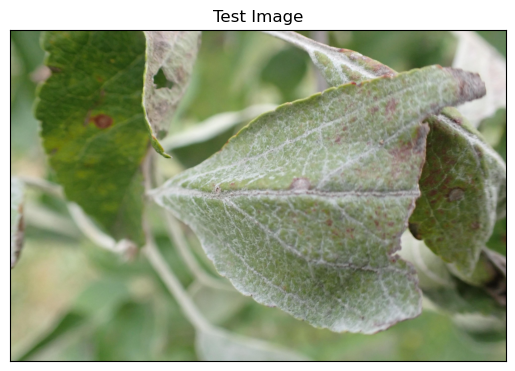

In [15]:
#Test Image Visualization
import cv2
image_path = 'Dataset/test/Powdery/9e0ba1619bdf4943.JPG'
# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) 
# Displaying the image 
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

In [16]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 579ms/step


In [17]:
print(predictions)

[[5.9817521e-05 9.9981374e-01 1.2644663e-04]]


In [18]:
result_index = np.argmax(predictions) #Return index of max element
print(result_index)

1


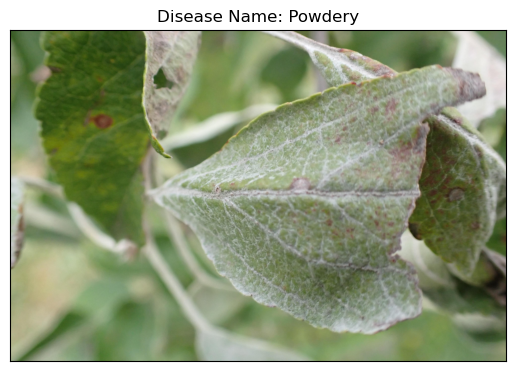

In [19]:
# Displaying the disease prediction
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()